#  Importing Libraries

In [3]:
# TensorFlow library import kar rahe hain
# Ye Deep Learning aur Machine Learning models banane ke liye use hota hai
import tensorflow as tf

# Matplotlib se data visualization ke liye plots (charts, graphs) banate hain
import matplotlib.pyplot as plt

# Pandas ek data analysis library hai, jo mainly DataFrames ke form me data handle karti hai
import pandas as pd

# Seaborn ek statistical data visualization library hai
# Ye matplotlib par based hai aur zyada attractive graphs banata hai
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [3]:
# code taken from :  https://keras.io/api/data_loading/image/
# Training dataset ko TensorFlow ke built-in image_dataset_from_directory function se load kar rahe hain
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',  # Jaha images store hain (train folder)

    labels="inferred",
    # Labels automatically folder ke naam se infer (detect) ho jayenge
    # Example: agar 'train/cat' aur 'train/dog' hai to classes ["cat", "dog"] banengi
   
    label_mode="categorical",
    # Labels categorical (one-hot encoded) format me aayenge
    # Example: [1,0,0] for class 1 , [0,1,0] for class 2 etc
    
    class_names=None,
    # Agar None hai to TensorFlow automatically sub-folder ke naam ko class samjhega
    # Example: 'cat', 'dog', 'horse' 

    color_mode="rgb", 
    # Images RGB (3 channel) me load hongi. Option: "grayscale" bhi use ho sakta hai
    
    batch_size=32,  
    # Neural network ek baar me 32 images process karega (training speed aur memory balance ke liye) 
    
    image_size=(128, 128), 
    # Har image ko resize karke 128x128 pixels banayenge (uniform input size for CNN)
    
    shuffle=True,   
    # Data ko randomly shuffle karenge taaki model bias na ho aur training effective ho
    
    seed=None,  
    # Random seed fix karne ke liye (reproducibility). Yaha None hai to random har run par alag hoga
    
    validation_split=None, 
    # Agar dataset ko split karna hai (train/validation) to value 0.2 jaisi set kar sakte hain
    
    subset=None,  
    # Agar validation_split diya hai to subset me 'training' ya 'validation' dena hoga
    
    interpolation="bilinear",  
    # Image resize karte waqt pixels ko bilinear interpolation se calculate karenge
    
    follow_links=False, 
    # Agar symbolic links hain dataset me to follow kare ya nahi
    
    crop_to_aspect_ratio=False, 
    # Agar True karte hain to image resize karte waqt crop hogi taaki aspect ratio same rahe
    
    pad_to_aspect_ratio=False,  
    # Agar True karte hain to image me padding add hogi taaki aspect ratio maintain ho

    verbose=True, 
    # Dataset loading ke dauraan progress print karega
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
# training_set ek TensorFlow dataset hai jisme images (x) aur labels (y) hote hain
for x,y in training_set:
    # x = batch of images
    # y = batch of labels (one-hot encoded format, since we used label_mode="categorical")

    print(x, x.shape)
    # yaha x ek tensor hoga jisme images store hongi
    # x.shape: (batch_size, height, width, channels)
    # Example: (32, 128, 128, 3) 
    # -> 32 images ek batch me, har image 128x128 pixels, aur 3 color channels (RGB)
    
    print(y, y.shape)
    # y ek tensor hoga jisme labels store honge
    # y.shape: (batch_size, number_of_classes)
    # Example: (32, 3) -> 32 images ke labels, aur 3 classes (one-hot encoded)

    break  # sirf first batch dikhane ke liye loop ko break kar diya

tf.Tensor(
[[[[128.5  114.5  111.5 ]
   [118.25 104.25 101.25]
   [118.75 104.75 101.75]
   ...
   [ 94.75  84.75  83.75]
   [126.   116.   115.  ]
   [ 97.    87.    86.  ]]

  [[125.5  111.5  108.5 ]
   [133.5  119.5  116.5 ]
   [123.5  109.5  106.5 ]
   ...
   [105.75  95.75  94.75]
   [ 88.    78.    77.  ]
   [ 97.75  87.75  86.75]]

  [[115.25 101.25  98.25]
   [134.25 120.25 117.25]
   [110.75  96.75  93.75]
   ...
   [ 91.5   81.5   80.5 ]
   [102.75  92.75  91.75]
   [ 94.75  84.75  83.75]]

  ...

  [[194.   191.   186.  ]
   [187.   184.   179.  ]
   [196.5  193.5  188.5 ]
   ...
   [147.25 142.25 146.25]
   [146.5  141.5  145.5 ]
   [137.25 132.25 136.25]]

  [[187.   184.   179.  ]
   [193.5  190.5  185.5 ]
   [197.75 194.75 189.75]
   ...
   [138.75 133.75 137.75]
   [145.75 140.75 144.75]
   [142.   137.   141.  ]]

  [[199.25 196.25 191.25]
   [193.   190.   185.  ]
   [194.5  191.5  186.5 ]
   ...
   [145.25 140.25 144.25]
   [148.   143.   147.  ]
   [149.25 144.25 14

## Building Model

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more features from images there may be possibility that model unable to capture relevant feature or model is confusing due to lack of features so feed with more feature

In [57]:
# Importing required layers from TensorFlow Keras
# Ye layers CNN (Convolutional Neural Network) banane me use hote hain
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
# Dense:
# Fully Connected Layer (Neural Network ka standard layer)
# Mostly last me use hota hai classification ke liye

# Conv2D:
# Convolutional Layer - images ke upar filters (kernels) lagakar features nikalta hai
# Example: edges, corners, shapes detect karta hai

# MaxPool2D:
# Max Pooling layer - feature maps ka size chhota karta hai
# Sirf maximum value rakhta hai ek chhote block ka (downsampling karta hai)
# Isse computation fast hota hai aur noise kam hoti hai

# Flatten:
# Convolution aur Pooling ke baad jo 2D feature maps bante hain
# Unhe ek single 1D vector me convert karta hai taki Dense layer ko diya ja sake

# Dropout:
# Overfitting avoid karne ke liye neurons ko randomly "off" karta hai training ke dauran
# Example: Dropout(0.5) matlab 50% neurons randomly inactive honge

from tensorflow.keras.models import Sequential
# Sequential model import kar rahe hain
# Iska use ek CNN model banane me hota hai jisme layers sequential (ek ke baad ek) jodte hain

In [8]:
# Sequential model ka object create kar rahe hain
# Ye ek simple linear stack hai jisme layers sequentially (ek ke baad ek) add kiye jate hain
model = Sequential()

## Building Convolution Layer

In [9]:
# 1st Convolutional Layer
# filters = 32  → is layer me 32 feature detectors (kernels) honge
# kernel_size = 3 → har filter 3x3 ka hoga (image ke upar slide karega)
# padding = 'same' → output size input ke equal rahega (zero-padding apply hoga)
# activation = 'relu' → ReLU activation lagane se negative values remove hoti hain (non-linearity aati hai)
# input_shape = [128,128,3] → input images ka size (128x128 pixels, 3 channels RGB)
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128, 128, 3]))

# 2nd Convolutional Layer
# Isme bhi 32 filters hain aur 3x3 kernel hai
# Ye pehle Conv2D ke output (feature maps) se aur zyada complex features extract karega
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))

# Max Pooling Layer
# pool_size = 2 → 2x2 area me max value le lega (downsampling karega)
# strides=2 → har step par 2 pixels slide karega (output size half ho jayega)
# Ye layer model ko computationally efficient banati hai aur important features ko retain karti hai
model.add(MaxPool2D(pool_size = 2, strides=2))

C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides=2))

In [11]:
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides=2))

In [12]:
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides=2))

In [13]:
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides=2))

In [ ]:
model.add(Dropout(0.25)) 
# Overfitting avoid karne ke liye 25% neurons randomly deactivate honge training ke time

In [15]:
# Flatten Layer
# Iska kaam hai multidimensional feature maps ko ek single 1D vector me convert karna
# Example: (64, 64, 32) feature maps → flatten → (131072,)
# Ye vector ab Dense (fully connected) layers me input ke liye ready ho jata hai
model.add(Flatten())

In [58]:
# Dense Hidden Layer
# units = 1500 → is layer me 1500 neurons (nodes) honge
# activation = 'relu' → Rectified Linear Unit lagane se model non-linear relationships seekh pata hai
# Ye layer CNN ke extracted features ko combine karke high-level decision making karti hai
model.add(Dense(units=1500,activation='relu'))

In [ ]:
model.add(Dropout(0.4))
# Training ke dauran 40% neurons randomly deactivate honge, overfitting ko aur kam karne ke liye

In [18]:
# Output Layer
# units = 38 → kyunki dataset me 38 classes hain (har class ek output neuron lega)
# activation = 'softmax' → Softmax function har class ke liye probability generate karega
# Final prediction wahi class hogi jiska probability sabse zyada hoga
model.add(Dense(units=38,activation='softmax')) 

## Compiling Model

In [59]:
# Model ko compile kar rahe hain
model.compile(
    # Optimizer define karte hain: Adam (Adaptive Moment Estimation)
    # Adam ek advanced optimizer hai jo Gradient Descent + Momentum ka combination use karta hai
    # Isme learning_rate manually set kiya gaya hai 0.0001
    # Matlab weight update slow hoga (zyada stable learning ke liye)
    optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.0001),

    # Loss function: categorical_crossentropy
    # Ye multi-class classification problems ke liye best hai
    # Jaise yahan 38 classes hain → har image ek class me belong karti hai
    # Cross-entropy loss model ko correct class ke probability maximize karna sikhata hai
    loss='categorical_crossentropy',

    # Metrics: accuracy
    # Training aur Validation ke dauran performance ko measure karne ke liye accuracy use karenge
    # Accuracy batata hai ki total predictions me se kitne correct the
    metrics=['accuracy'] 
)

In [20]:
#  Model summary
# - Har layer ka detail (layer type, output size, parameters) dikhata hai
# - Isse confirm kar sakte ho ki architecture sahi bana hai ya nahi
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [21]:
#  Model training
# - yaha hum apne CNN model ko training data par train kar rahe hain

training_history = model.fit(
    x=training_set,           # - x = training_set → input images + labels (yeh model ko sikhayega)
    validation_data=validation_set,    # - validation_data = validation_set → model ki performance check karne ke liye use hota hai
    epochs = 10   # - epochs = 10 → pura dataset 10 baar model ko train karne ke liye diya jaayega
)

# Output:
# - 'training_history' variable me pura training ka record store hoga
# - har epoch ka 'loss' aur 'accuracy' (training aur validation dono) save hota hai
# - later hum ise use karke graphs bana sakte hain (accuracy vs epochs, loss vs epochs)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3114s 1s/step - accuracy: 0.5977 - loss: 1.3628 - val_accuracy: 0.8337 - val_loss: 0.5154
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2658s 1s/step - accuracy: 0.8578 - loss: 0.4543 - val_accuracy: 0.9108 - val_loss: 0.2831
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2810s 1s/step - accuracy: 0.9131 - loss: 0.2704 - val_accuracy: 0.9267 - val_loss: 0.2219
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 19696s 9s/step - accuracy: 0.9393 - loss: 0.1863 - val_accuracy: 0.9405 - val_loss: 0.1838
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6769s 3s/step - accuracy: 0.9552 - loss: 0.1369 - val_accuracy: 0.9376 - val_loss: 0.1999
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2437s 1s/step - accuracy: 0.9631 - loss: 0.1112 - val_accuracy: 0.9443 - val_loss: 0.1864
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 6420s 3s/step - accuracy: 0.9715 - loss: 0.0898 - val_accuracy: 0.9531 - val_loss: 0.1501
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2108s 959ms/step - accuracy: 0.97

### Model Evaluation

In [26]:
# Model ko evaluate kar rahe hain training dataset par
train_loss,train_acc = model.evaluate(training_set)

# Output Explanation:
# - train_loss → Training dataset par model ka loss (jitna kam utna achha)
# - train_acc  → Training dataset par model ki accuracy (jitni zyada utni achhi)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 715s 325ms/step - accuracy: 0.9890 - loss: 0.0334 


In [29]:
print(train_loss,train_acc)

0.033366404473781586 0.9889892339706421


In [27]:
# Model ko evaluate kar rahe hain Validation dataset par
val_loss,val_acc = model.evaluate(validation_set)

# Output Explanation:
# - val_loss → Validation dataset par model ka loss (error measure)
# - val_acc  → Validation dataset par model ki accuracy (performance measure)
#              Matlab unseen data (jo training me use nahi hua) par model kaisa perform kar raha hai

550/550 ━━━━━━━━━━━━━━━━━━━━ 165s 300ms/step - accuracy: 0.9601 - loss: 0.1316


In [30]:
print(val_loss,val_acc)

0.1316310465335846 0.960050106048584


### Saving Model

In [32]:
# Apne trained CNN model ko save kar rahe hain
model.save("trained_model.keras")

# Output Explanation:
# - Ye command pura trained model ek file ke andar save kar deta hai
# - Is file me following cheezein store hoti hain:
#   1. Model architecture (layers ka structure: Conv2D, Dense, Dropout, etc.)
#   2. Learned weights (jo training ke dauran model ne seekhe)
#   3. Compile information (optimizer, loss, metrics)
#   4. Training configuration (agar specify kiya ho)

# Fayda:
# - Aapko model dobara train karne ki zarurat nahi hogi
# - Future me is model ko directly load karke use kar sakte hain predictions ke liye

In [28]:
# Training ke baad jitna bhi data save hua tha usko check karna
training_history.history

{'accuracy': [0.5976812243461609,
  0.8577708005905151,
  0.9130521416664124,
  0.9392844438552856,
  0.9551888704299927,
  0.9630556702613831,
  0.9715058207511902,
  0.9742087125778198,
  0.9802119731903076,
  0.9813215732574463],
 'loss': [1.3628089427947998,
  0.4543163776397705,
  0.27043023705482483,
  0.1862567812204361,
  0.13689430058002472,
  0.11122043430805206,
  0.0898260697722435,
  0.07764863222837448,
  0.06264440715312958,
  0.05773283168673515],
 'val_accuracy': [0.8337126970291138,
  0.910767138004303,
  0.926701545715332,
  0.9405303597450256,
  0.9376280307769775,
  0.9442863464355469,
  0.9531072378158569,
  0.9593102931976318,
  0.9696107506752014,
  0.960050106048584],
 'val_loss': [0.5154356360435486,
  0.2831163704395294,
  0.2218562662601471,
  0.18381401896476746,
  0.199945330619812,
  0.1864061951637268,
  0.1500960737466812,
  0.14007239043712616,
  0.09864388406276703,
  0.13163107633590698]}

In [33]:
# Recording History in json
import json  # Python ka built-in JSON library import karna
with open("training_hist.json","w") as f:
    # "training_hist.json" naam ki file write mode ("w") me khol rahe hain
    # 'f' ek file object ban jayega
    
    json.dump(training_history.history,f)
    # training_history.history (jo ek dictionary hai) ko JSON format me save kar dete hain

## Accuracy Visualization

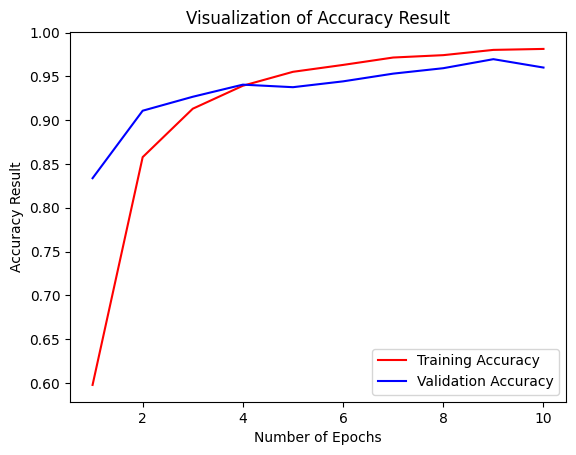

In [40]:
# Epochs list banayi jisme 1 se 10 tak numbers hain (kyunki humne 10 epochs ke liye train kiya tha)
epochs = [i for i in range(1,11)]

# Training accuracy ko plot karna (x-axis = epochs, y-axis = accuracy values)
plt.plot(epochs, training_history.history['accuracy'],color = 'red', label = 'Training Accuracy')

# Validation accuracy ko plot karna (model ki generalization check karne ke liye)
plt.plot(epochs, training_history.history['val_accuracy'],color = 'blue', label = 'Validation Accuracy')

# X-axis ka label
plt.xlabel("Number of Epochs")

# Y-axis ka label
plt.ylabel("Accuracy Result")

# Graph ka title
plt.title("Visualization of Accuracy Result")

# Legend dikhana (taaki pata chale red line kya hai aur blue line kya hai)
plt.legend()

# Final graph display karna
plt.show()

### Some other metrics for model evaluation

In [42]:
# Validation dataset se class (folder) ke names nikalna
class_name = validation_set.class_names

# Class names ko print karna
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [43]:
# Ye block "valid" folder se test/validation dataset load karne ke liye hai
# - Har class ka ek alag folder hona chahiye (folder name = class label)
# - TensorFlow automatically folder names ko class labels me convert karega
# - Saare images ko 128x128 RGB format me resize karke batches (32 images ek batch) banayega
# - Labels categorical (one-hot encoded) form me milenge (multi-class classification ke liye)
# - shuffle=False rakha gaya hai taaki prediction ka order images ke order se match ho
# - Final output ek tf.data.Dataset object hoga jise model.evaluate() ya model.predict() me directly use kar sakte hain

test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [45]:
# ------------------------------------------------------------
# Model Prediction on Test Set
# ------------------------------------------------------------
# 1. model.predict(test_set):
#    - Trained CNN model ko test dataset par chalata hai.
#    - Har image ke liye ek probability distribution deta hai 
#      (softmax output) jo har class ki probability show karta hai.
#    - Example: [0.01, 0.05, 0.60, 0.02, ..., 0.03]
#      Yaha sabse zyada probability wali class ko model predict karega.
#
# 2. y_pred:
#    - Numpy array jisme sabhi images ke liye prediction probabilities hoti hain.
#    - Shape hamesha (total_test_images, num_classes) hota hai.
#    - Agar 1215 test images aur 38 classes hain → (1215, 38).
#
# 3. y_pred.shape:
#    - Predicted results ka structure verify karta hai.
#    - Batata hai ki kitni images par prediction hua aur kitni classes ke liye.
# ------------------------------------------------------------
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 175s 318ms/step


(array([[9.9981004e-01, 5.2734629e-07, 2.9857534e-07, ..., 1.4900340e-11,
         6.9408624e-12, 5.5692020e-11],
        [9.9999964e-01, 2.3510839e-07, 9.3709147e-09, ..., 2.9624971e-15,
         6.8177445e-15, 3.8914155e-13],
        [9.8037440e-01, 7.5344062e-08, 3.5714271e-07, ..., 3.2106427e-13,
         5.2925091e-12, 1.9195213e-10],
        ...,
        [1.0332178e-09, 2.4310276e-14, 2.4776536e-09, ..., 5.1372131e-12,
         4.1888770e-11, 9.9999642e-01],
        [7.8234681e-09, 1.9418041e-12, 2.0194217e-09, ..., 2.1007425e-10,
         2.3176633e-10, 9.9999976e-01],
        [2.5790520e-12, 2.3487709e-14, 7.9394871e-14, ..., 1.1464912e-14,
         4.9935858e-12, 9.9999833e-01]], shape=(17572, 38), dtype=float32),
 (17572, 38))

In [46]:
# ------------------------------------------------------------
# Converting Probabilities into Class Predictions
# ------------------------------------------------------------
# - y_pred: abhi ek 2D array hai (num_images × num_classes),
#   jisme har image ke liye har class ki probability hoti hai.
#
# - tf.argmax(y_pred, axis=1):
#   → Har row (ek image ka prediction) me sabse badi probability
#     ka index return karega.
#   → Example: agar ek image ke liye prediction hai
#       [0.01, 0.05, 0.60, 0.02, ..., 0.03]
#     to sabse badi value 0.60 (index = 2) hai,
#     matlab predicted class index = 2.
#
# - predicted_categories:
#   → Tensor jisme har image ke liye predicted class ka index hoga.
#   → Shape = (num_images,)
#   → Example: [2, 5, 10, 0, ...]
# ------------------------------------------------------------
predicted_categories = tf.argmax(y_pred,axis=1)

In [47]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], shape=(17572,))>

In [49]:
# ------------------------------------------------------------
# Extracting True Labels from the Test Set
# ------------------------------------------------------------
# - test_set: ek tf.data.Dataset object hai jisme (images, labels) 
#   batches ke form me stored hote hain.
#
# - for x, y in test_set:
#     → Har batch ke liye 'x' = images aur 'y' = labels (one-hot encoded) milte hain.
#
# - [y for x, y in test_set]:
#     → Is list comprehension se test_set ke sabhi batches se 
#       sirf labels 'y' ko extract kiya ja raha hai.
#     → Result: ek list of tensors (har batch ke labels).
#
# - tf.concat(..., axis=0):
#     → Saare batch-wise label tensors ko vertically (row-wise) 
#       concatenate kar diya jaata hai.
#     → Matlab ek hi bada tensor ban jata hai jisme test set ke 
#       sabhi true labels store hote hain.
#
# - true_categories:
#     → Ek tensor jiska shape = (num_images, num_classes).
#     → Har row ek one-hot vector hota hai (true class ka encoding).
# ------------------------------------------------------------
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(17572, 38), dtype=float32)>

In [50]:
# ------------------------------------------------------------
# Converting True Labels (One-hot) into Class Indices
# ------------------------------------------------------------
# - true_categories: abhi ek 2D tensor hai (num_images × num_classes)
#   jisme har image ke liye ek one-hot encoded vector hai.
#
# - tf.argmax(true_categories, axis=1):
#   → Har row (ek image ke labels) me 1 ki position nikalta hai.
#   → Ye position hi actual class index hota hai.
#
# - Example:
#     true_categories row = [0, 0, 1, 0, 0, ..., 0]
#     tf.argmax(..., axis=1) → 2 (matlab class index = 2)
#
# - Y_true:
#   → Tensor jisme har test image ke liye sahi class ka index hoga.
#   → Shape = (num_images,)
#   → Example: [2, 0, 5, 10, ...]
# ------------------------------------------------------------
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], shape=(17572,))>

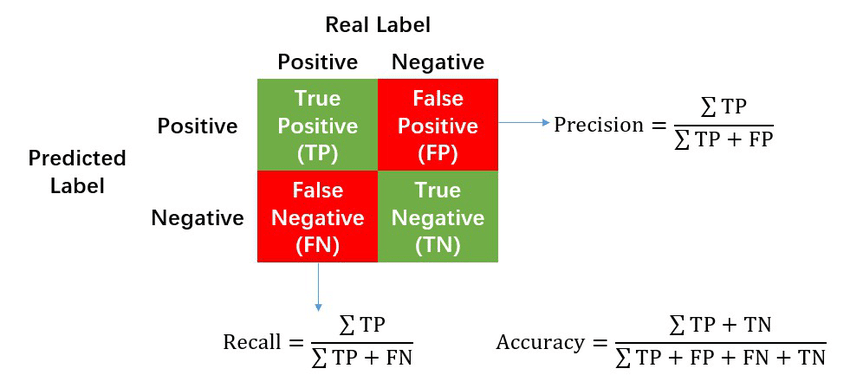

In [60]:
# link is below to answer why we use this library
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# ------------------------------------------------------------
# Importing Metrics for Model Evaluation
# ------------------------------------------------------------
# - classification_report:
#     → Har class ke liye Precision, Recall, F1-Score aur Support deta hai.
#     → Precision = TP / (TP + FP)
#     → Recall    = TP / (TP + FN)
#     → F1-Score  = 2 * (Precision * Recall) / (Precision + Recall)
#     → Support   = Har class ke actual samples ki ginti
#
# - confusion_matrix:
#     → Ek 2D matrix hai jisme rows = actual classes 
#       aur columns = predicted classes.
#     → Har cell batata hai ki kitni images ek class ki dusri class 
#       ke saath confuse ho gayi.
#
# Ye dono metrics milke model ka **detailed performance analysis** karne me madad karte hain.
# ------------------------------------------------------------
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
# ------------------------------------------------------------
# Classification Report with Class Names
# ------------------------------------------------------------
# - Y_true              → Actual Labels (Ground Truth)
# - predicted_categories → Model ke Predicted Labels
# - target_names=class_name → Report me har class ka naam 
#   show hoga (sirf index 0,1,2... nahi).
#
# Output:
#   - Precision (kitna sahi predict kiya among predicted positives)
#   - Recall (kitna sahi predict kiya among actual positives)
#   - F1-score (Precision & Recall ka harmonic mean)
#   - Support (har class me kitne samples the)
#
# Example output hoga:
#
#              precision    recall  f1-score   support
#   Cat            0.95       0.93      0.94       120
#   Dog            0.92       0.94      0.93       130
#
# Is report se pata chalega kaun si classes me model strong hai,
# aur kaun si classes me galtiyan ho rahi hain.
# ------------------------------------------------------------
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.91      0.95       504
                                 Apple___Black_rot       0.98      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.96      0.93      0.94       502
                               Blueberry___healthy       0.97      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.94      0.90       410
                       Corn_(maize)___Common_rust_       0.97      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.93      0.

In [63]:
# ------------------------------------------------------------
# Confusion Matrix Calculation
# ------------------------------------------------------------
# - Y_true              → Actual Labels (Ground Truth)
# - predicted_categories → Model ke Predicted Labels
#
# cm = confusion_matrix(Y_true, predicted_categories)
#
# Output: ek 2D matrix (N x N) jaha N = number of classes
# Example (3 classes: Cat, Dog, Horse):
#
#        Predicted
#        C   D   H
#   C [[ 50,  2,  3],   <- Actual Cat
#   D  [  1, 45,  4],   <- Actual Dog
#   H  [  2,  3, 47]]   <- Actual Horse
#
# Matrix ka har row = actual class
# Matrix ka har column = predicted class
#
# Isse clear hoga model ne kaun si class ko galat samjha.
# ------------------------------------------------------------
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[460,   3,   3, ...,   0,   0,   0],
       [  1, 490,   0, ...,   0,   0,   0],
       [  0,   0, 434, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   0, ...,   0,   0, 471]], shape=(38, 38))

### Confusion Matrix Visualization

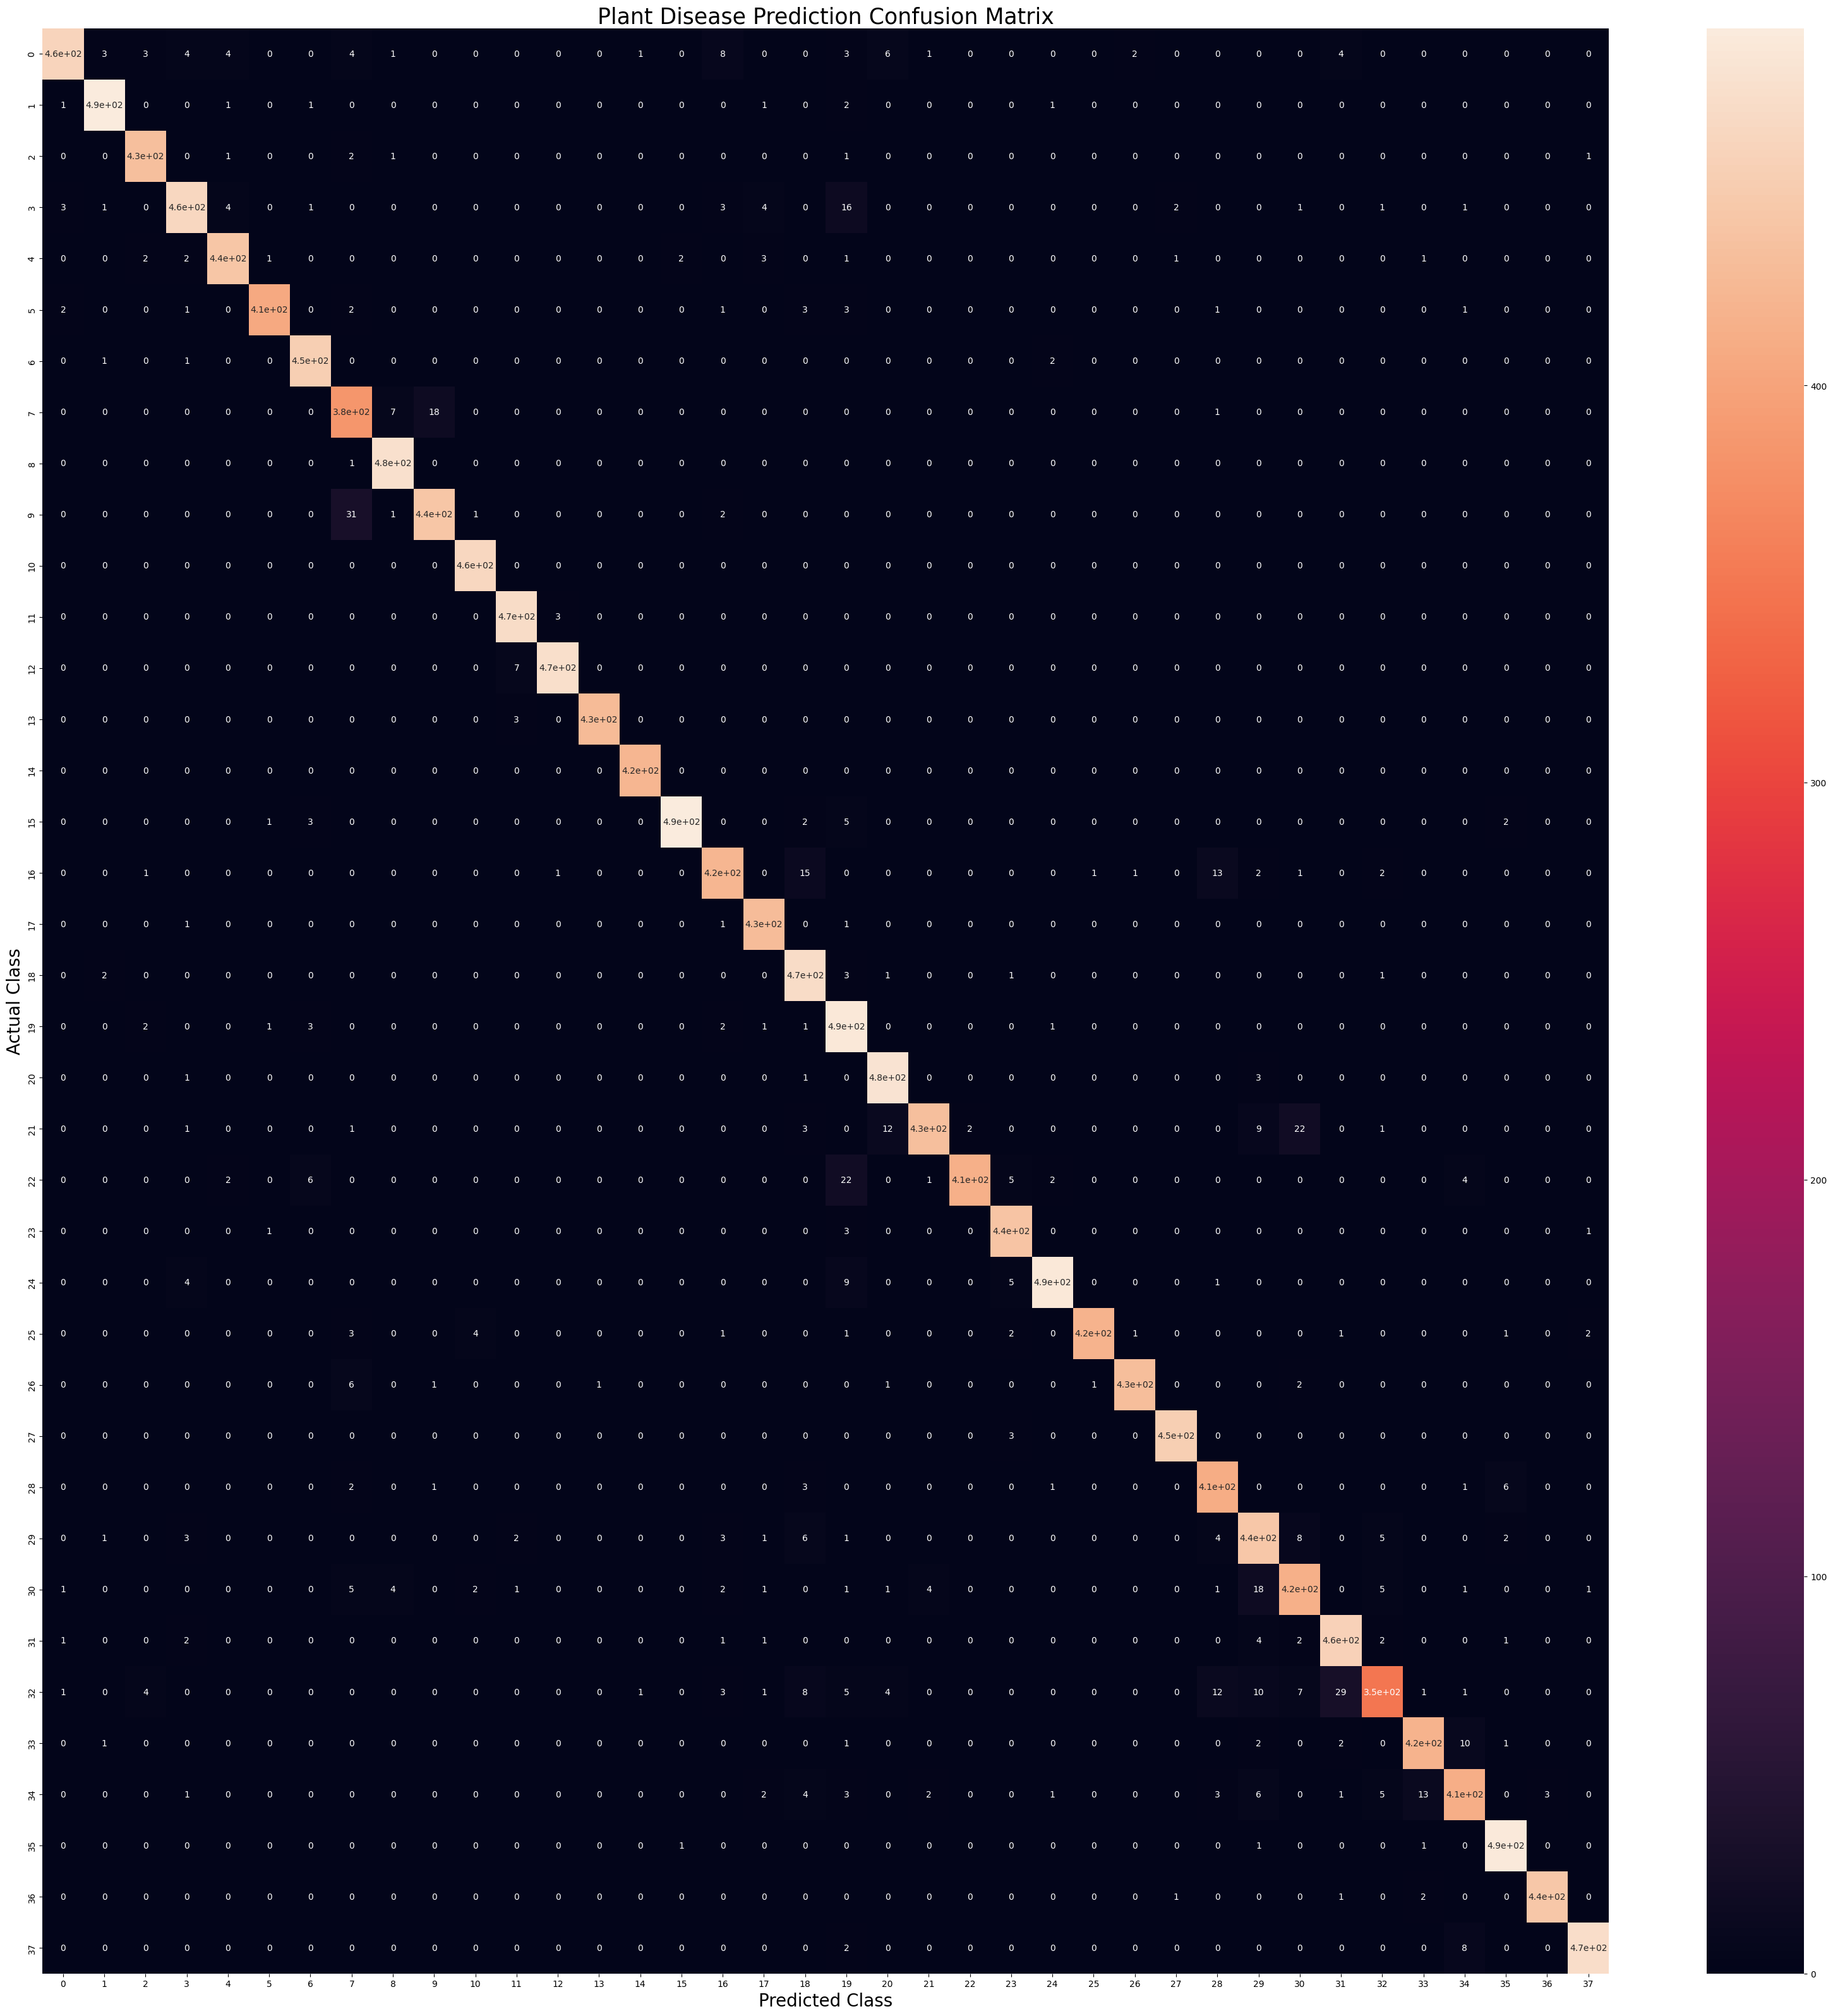

In [75]:
# ------------------------------------------------------------
# Confusion Matrix Visualization (Heatmap)
# ------------------------------------------------------------
plt.figure(figsize = (40, 40))
# - Figure size ko bada rakha (40x40), kyunki classes zyada ho sakti hain
# - Agar chhota size rakhoge to labels overlap honge
sns.heatmap(cm,annot=True,annot_kws={'size' : 10})
# - cm → confusion matrix (2D array)
# - annot=True → matrix ke andar values dikhengi
# - annot_kws={'size':10} → font size chhota rakha values ke liye
plt.xlabel("Predicted Class", fontsize = 20)
# X-axis → Predicted Classes
plt.ylabel("Actual Class", fontsize = 20)
# Y-axis → Actual Classes
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
# Title set kiya taaki clear ho graph ka context
plt.show()
# Graph ko display karne ke liye
# ------------------------------------------------------------